# Exercice 1 : Display a choropleth map with Boys/girls total births disparity

### In this case, the disparity between boys and girls by number of births shows us which sex is dominant in each department.

In [2]:
import pandas as pd
import sys
path = fr"{str(sys.executable)}"
get_ipython().system('"{path}" -m pip install geopandas --user')
import geopandas as gpd
map_df = gpd.read_file("departements-20140306-5m-shp/departements-20140306-5m.shp")
import matplotlib as plt
%matplotlib inline
prenoms= pd.read_csv("dpt2018.csv",sep=";")

In [8]:
prenoms_boys = prenoms[prenoms.sexe == 1]

In [10]:
dpt_sum_boys=prenoms_boys.groupby("dpt").nombre.sum()

In [11]:
dpt_sum_boys

dpt
01      222361
02      428461
03      253694
04       55230
05       65182
        ...   
971     338105
972     333358
973      91719
974     612562
XX     3684762
Name: nombre, Length: 100, dtype: int64

In [12]:
prenoms_girls = prenoms[prenoms.sexe == 2]

In [13]:
dpt_sum_girls=prenoms_girls.groupby("dpt").nombre.sum()

In [14]:
dpt_sum_girls

dpt
01      215543
02      414479
03      244675
04       50509
05       60889
        ...   
971     302549
972     304469
973      77466
974     579445
XX     4576926
Name: nombre, Length: 100, dtype: int64

In [17]:
dpt_disparity = dpt_sum_boys / dpt_sum_girls

In [18]:
dpt_disparity

dpt
01     1.031632
02     1.033734
03     1.036861
04     1.093468
05     1.070505
         ...   
971    1.117521
972    1.094883
973    1.183990
974    1.057153
XX     0.805074
Name: nombre, Length: 100, dtype: float64

In [19]:
dpt_disparity=dpt_disparity.reset_index()

In [20]:
dpt_disparity

,dpt,nombre
0,01,1.031632
1,02,1.033734
2,03,1.036861
3,04,1.093468
4,05,1.070505
...,...,...
95,971,1.117521
96,972,1.094883
97,973,1.183990
98,974,1.057153


In [21]:
dpt_disparity["code_insee"]=dpt_disparity.dpt

In [22]:
dpt_disparity

,dpt,nombre,code_insee
0,01,1.031632,01
1,02,1.033734,02
2,03,1.036861,03
3,04,1.093468,04
4,05,1.070505,05
...,...,...,...
95,971,1.117521,971
96,972,1.094883,972
97,973,1.183990,973
98,974,1.057153,974


In [28]:
map_df=map_df[map_df.code_insee.str.contains("\d\d\d")==False]

In [29]:
merged = map_df.merge(dpt_disparity, on='code_insee')

In [30]:
merged

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",01,1.031632
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",02,1.033734
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",03,1.036861
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",04,1.093468
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",05,1.070505
...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",91,1.086272
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",92,1.072948
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,1.075698
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,1.074076


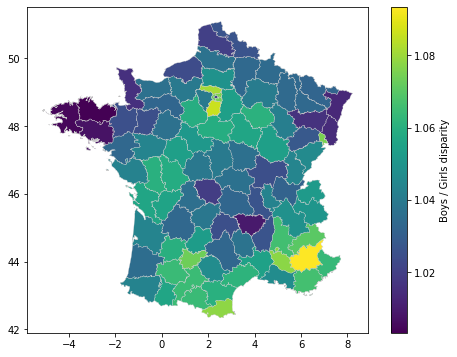

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Boys / Girls disparity"})

# Exercice 2 : Display a choropleth map with number of girls named Emma born in 2018

In [35]:
prenoms_emma = prenoms[prenoms.preusuel == "EMMA"]

In [39]:
prenoms_emma

,sexe,preusuel,annais,dpt,nombre
427782,1,EMMA,1906,972,3
427783,1,EMMA,1909,972,3
427784,1,EMMA,1910,972,5
427785,1,EMMA,1913,972,6
427786,1,EMMA,1919,972,3
...,...,...,...,...,...
2295768,2,EMMA,2018,971,17
2295769,2,EMMA,2018,972,11
2295770,2,EMMA,2018,973,11
2295771,2,EMMA,2018,974,43


In [40]:
prenoms_emma_2018 = prenoms_emma[prenoms_emma.annais == "2018"]

In [41]:
prenoms_emma_2018

,sexe,preusuel,annais,dpt,nombre
2295674,2,EMMA,2018,01,37
2295675,2,EMMA,2018,02,38
2295676,2,EMMA,2018,03,28
2295677,2,EMMA,2018,04,6
2295678,2,EMMA,2018,05,10
...,...,...,...,...,...
2295767,2,EMMA,2018,95,79
2295768,2,EMMA,2018,971,17
2295769,2,EMMA,2018,972,11
2295770,2,EMMA,2018,973,11


In [43]:
prenoms_emma_2018=prenoms_emma_2018.reset_index()

In [44]:
prenoms_emma_2018["code_insee"]=prenoms_emma_2018.dpt

In [45]:
prenoms_emma_2018

,index,sexe,preusuel,annais,dpt,nombre,code_insee
0,2295674,2,EMMA,2018,01,37,01
1,2295675,2,EMMA,2018,02,38,02
2,2295676,2,EMMA,2018,03,28,03
3,2295677,2,EMMA,2018,04,6,04
4,2295678,2,EMMA,2018,05,10,05
...,...,...,...,...,...,...,...
93,2295767,2,EMMA,2018,95,79,95
94,2295768,2,EMMA,2018,971,17,971
95,2295769,2,EMMA,2018,972,11,972
96,2295770,2,EMMA,2018,973,11,973


In [46]:
merged2 = map_df.merge(prenoms_emma_2018, on='code_insee')

In [47]:
merged2

,code_insee,nom,nuts3,wikipedia,geometry,index,sexe,preusuel,annais,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2295674,2,EMMA,2018,01,37
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2295675,2,EMMA,2018,02,38
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2295676,2,EMMA,2018,03,28
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2295677,2,EMMA,2018,04,6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2295678,2,EMMA,2018,05,10
...,...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2295763,2,EMMA,2018,91,75
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2295764,2,EMMA,2018,92,142
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2295765,2,EMMA,2018,93,48
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2295766,2,EMMA,2018,94,102


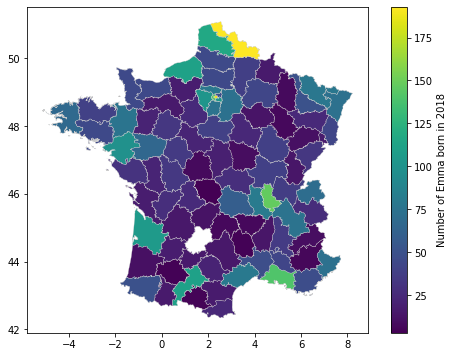

In [48]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged2.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma born in 2018"})

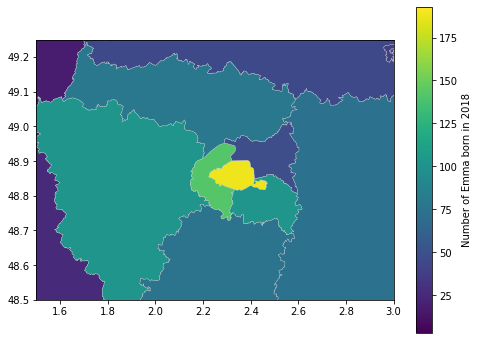

In [49]:
fig, ax = plt.subplots(1, figsize=(8, 6))
plt.axis([1.5,3,48.5,49.25])
merged2.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma born in 2018"})

# Exercice 3 : The same but weighted

In [86]:
pop_dpt = pd.read_csv("population-francaise-par-departement-2018.csv",sep=";", usecols = [0,2])

In [87]:
pop_dpt

,dpt,Population
0,1,649654.0
1,2,534286.0
2,3,338978.0
3,4,161664.0
4,6,1080614.0
...,...,...
102,85,680191.0
103,86,438136.0
104,88,364873.0
105,89,338303.0


### Estimation annuelle de la population des départements

### Source : INSEE

In [88]:
pop_fr = pop_dpt.Population.sum()

In [89]:
pop_fr

67186638.0

In [90]:
ratio = pop_dpt.Population / pop_fr

In [91]:
pop_dpt_ratio = pop_dpt

In [92]:
pop_dpt_ratio.Population = ratio

In [93]:
pop_dpt_ratio

,dpt,Population
0,1,0.009669
1,2,0.007952
2,3,0.005045
3,4,0.002406
4,6,0.016084
...,...,...
102,85,0.010124
103,86,0.006521
104,88,0.005431
105,89,0.005035


In [106]:
prenoms_emma_2018_weighted = prenoms_emma_2018

In [107]:
prenoms_emma_2018_weighted.nombre = prenoms_emma_2018_weighted.nombre*pop_dpt_ratio.Population

In [108]:
prenoms_emma_2018_weighted

,index,sexe,preusuel,annais,dpt,nombre,code_insee
0,2295674,2,EMMA,2018,01,0.357768,01
1,2295675,2,EMMA,2018,02,0.302186,02
2,2295676,2,EMMA,2018,03,0.141269,03
3,2295677,2,EMMA,2018,04,0.014437,04
4,2295678,2,EMMA,2018,05,0.160838,05
...,...,...,...,...,...,...,...
93,2295767,2,EMMA,2018,95,1.935538,95
94,2295768,2,EMMA,2018,971,0.144274,971
95,2295769,2,EMMA,2018,972,0.064246,972
96,2295770,2,EMMA,2018,973,0.042991,973


In [109]:
merged3 = map_df.merge(prenoms_emma_2018_weighted, on='code_insee')

In [110]:
merged3

,code_insee,nom,nuts3,wikipedia,geometry,index,sexe,preusuel,annais,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2295674,2,EMMA,2018,01,0.357768
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2295675,2,EMMA,2018,02,0.302186
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2295676,2,EMMA,2018,03,0.141269
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2295677,2,EMMA,2018,04,0.014437
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2295678,2,EMMA,2018,05,0.160838
...,...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2295763,2,EMMA,2018,91,0.632828
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2295764,2,EMMA,2018,92,0.916748
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2295765,2,EMMA,2018,93,1.016442
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2295766,2,EMMA,2018,94,1.908340


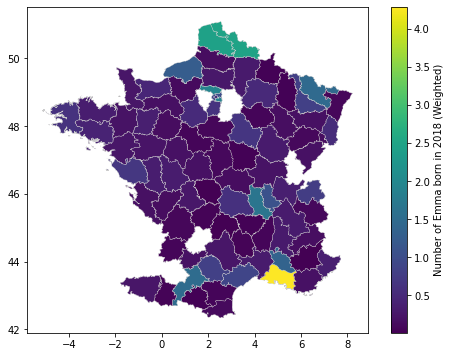

In [111]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged3.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma born in 2018 (Weighted)"})

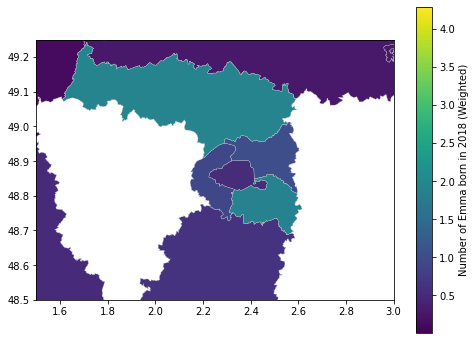

In [112]:
fig, ax = plt.subplots(1, figsize=(8, 6))
plt.axis([1.5,3,48.5,49.25])
merged3.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma born in 2018 (Weighted)"})